In [14]:
import numpy as np
import pandas as pd
import librosa

# from keras.models import Sequential
# from keras.layers import Dense
from sklearn.preprocessing import MultiLabelBinarizer
# from sklearn.model_selection import RepeatedKFold
# from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from tqdm import tqdm
import os
%matplotlib inline

In [2]:
DEV_ROOT = './Data/FSD50K.dev_audio/'
TEST_ROOT = './Data/FSD50K.eval_audio/'

raw_dev_df = pd.read_csv('./Data/FSD50K.ground_truth/dev.csv', dtype={'fname': 'string'})

test_df = pd.read_csv('./Data/FSD50K.ground_truth/eval.csv', dtype={'fname': 'string'})
vocab_df = pd.read_csv('./Data/FSD50K.ground_truth/vocabulary.csv', index_col=0, header=None, names=['label','mids'])
vocab_dict = dict(zip(vocab_df.mids, vocab_df.label))

raw_dev_df['mids'] = raw_dev_df['mids'].apply(lambda x: tuple(x.split(',')))
test_df['mids'] = test_df['mids'].apply(lambda x: tuple(x.split(',')))

one_hot_encoder = MultiLabelBinarizer()
one_hot_encoder.fit(raw_dev_df['mids'])
output_vec = one_hot_encoder.transform(raw_dev_df['mids'])
raw_dev_df['output_vec'] = output_vec.tolist()
output_vec = one_hot_encoder.transform(test_df['mids'])
test_df['output_vec'] = output_vec.tolist()

train_df = raw_dev_df[raw_dev_df['split'] == 'train']
val_df = raw_dev_df[raw_dev_df['split'] == 'val']

In [3]:
train_df.head()

,fname,labels,mids,split,output_vec
0,64760,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,16399,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,16401,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,16402,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,16404,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",train,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [9]:
def get_length(fname, ROOT):
    data, sample_rate = librosa.load(ROOT+fname+'.wav', sr = None)
    return (len(data)/sample_rate)

1.5573242630385487

In [ ]:
train_df['length'] = train_df['fname'].apply(lambda x: get_length(x,DEV_ROOT))
val_df['length'] = val_df['fname'].apply(lambda x: get_length(x,DEV_ROOT))
test_df['length'] = test_df['fname'].apply(lambda x: get_length(x,TEST_ROOT))

C:\Users\simma\AppData\Local\Temp\ipykernel_1816\2466011646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['length'] = train_df['fname'].apply(lambda x: get_length(x,DEV_ROOT))
C:\Users\simma\AppData\Local\Temp\ipykernel_1816\2466011646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_df['length'] = val_df['fname'].apply(lambda x: get_length(x,DEV_ROOT))


In [87]:
train_df['out_vec_len'] = train_df['output_vec'].apply(lambda x: x.count(1))
val_df['out_vec_len'] = val_df['output_vec'].apply(lambda x: x.count(1))
test_df['out_vec_len'] = test_df['output_vec'].apply(lambda x: x.count(1))

In [81]:
train_df.to_pickle('./Data/temp/train_df.pkl')
val_df.to_pickle('./Data/temp/val_df.pkl')
test_df.to_pickle('./Data/temp/test_df.pkl')

In [82]:
train_df = pd.read_pickle('./Data/temp/train_df.pkl')  
val_df = pd.read_pickle('./Data/temp/val_df.pkl')  
test_df = pd.read_pickle('./Data/temp/test_df.pkl')  

In [83]:
val_df.shape

(4170, 6)

Text(0.5, 1.0, 'Number of files and their duration')

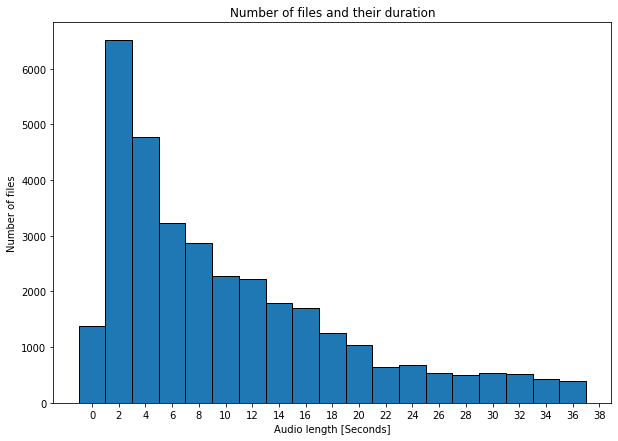

In [102]:
plt.figure(figsize=(10,7),edgecolor='blue')
plt.hist(train_df['length'], bins=np.arange(20)-0.5,range=(0,40),ec="black");
plt.xticks(range(20),range(0,40,2))
plt.xlabel('Audio length [Seconds]')
plt.ylabel('Number of files')
plt.title('Number of files and their duration')

Text(0.5, 1.0, 'Number of files and their duration')

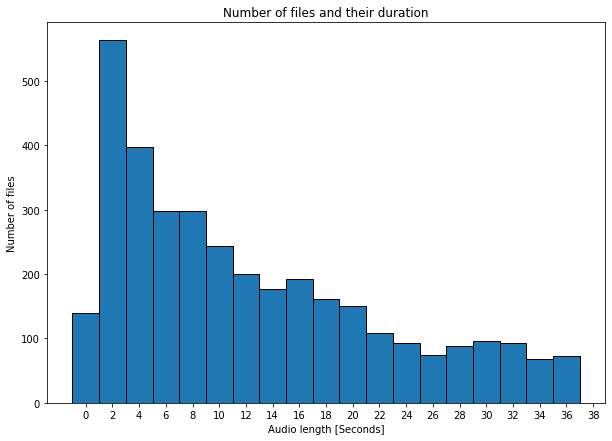

In [103]:
plt.figure(figsize=(10,7),edgecolor='blue')
plt.hist(val_df['length'], bins=np.arange(20)-0.5, range=(0,40),ec="black");
plt.xticks(range(20),range(0,40,2))
plt.xlabel('Audio length [Seconds]')
plt.ylabel('Number of files')
plt.title('Number of files and their duration')

Text(0.5, 1.0, 'Number of files and their duration')

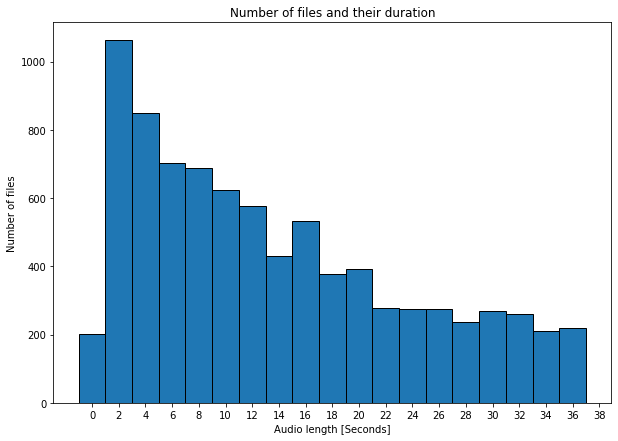

In [104]:
plt.figure(figsize=(10,7),edgecolor='blue')
plt.hist(test_df['length'], bins=np.arange(20)-0.5, range=(0,40),ec="black");
plt.xticks(range(20),range(0,40,2))
plt.xlabel('Audio length [Seconds]')
plt.ylabel('Number of files')
plt.title('Number of files and their duration')

In [88]:
val_df

,fname,labels,mids,split,output_vec,length,out_vec_len
5,345111,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9.340590,5
9,160826,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",6.801814,5
13,420945,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.000000,5
14,420946,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8.727279,5
15,420947,"Electric_guitar,Guitar,Plucked_string_instrume...","(/m/02sgy, /m/0342h, /m/0fx80y, /m/04szw, /m/0...",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4.571429,5
...,...,...,...,...,...,...,...
40883,362959,Livestock_and_farm_animals_and_working_animals...,"(/m/0ch8v, /m/0jbk)",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",21.514603,2
40885,32727,Livestock_and_farm_animals_and_working_animals...,"(/m/0ch8v, /m/0jbk)",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",10.506757,2
40886,322522,Livestock_and_farm_animals_and_working_animals...,"(/m/0ch8v, /m/0jbk)",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.018526,2
40897,17909,Livestock_and_farm_animals_and_working_animals...,"(/m/0ch8v, /m/0jbk)",val,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",20.864490,2


Text(0.5, 1.0, 'Number of files and count of labels associated with them')

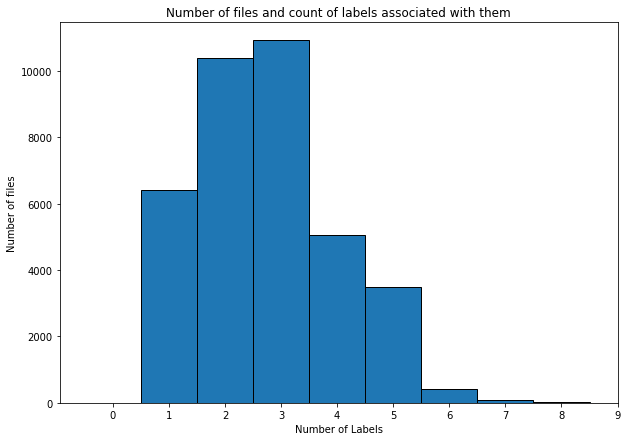

In [106]:
plt.figure(figsize=(10,7),edgecolor='blue')
plt.hist(train_df['out_vec_len'], bins=np.arange(10)-0.5,range=(0,10),ec="black");
plt.xticks(range(10),range(0,10))
plt.xlabel('Number of Labels')
plt.ylabel('Number of files')
plt.title('Number of files and count of labels associated with them')

Text(0.5, 1.0, 'Number of files and count of labels associated with them')

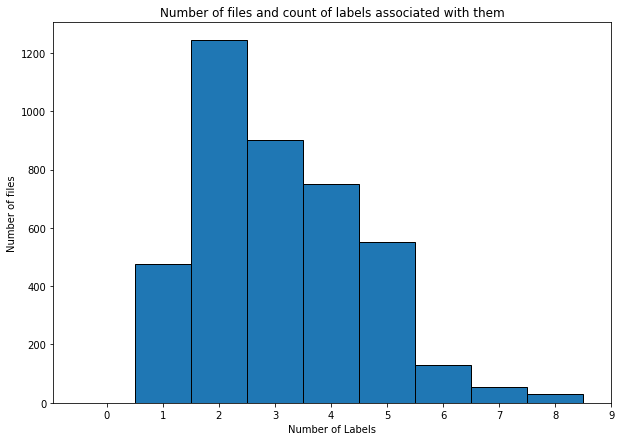

In [105]:
plt.figure(figsize=(10,7),edgecolor='blue')
plt.hist(val_df['out_vec_len'], bins=np.arange(10)-0.5,range=(0,10),ec="black");
plt.xticks(range(10),range(0,10))
plt.xlabel('Number of Labels')
plt.ylabel('Number of files')
plt.title('Number of files and count of labels associated with them')

Text(0.5, 1.0, 'Number of files and count of labels associated with them')

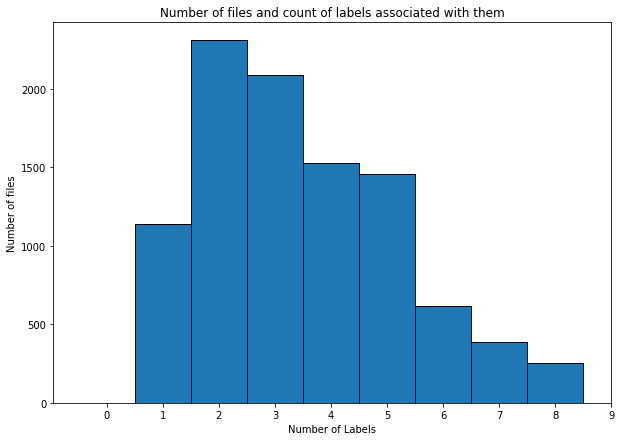

In [107]:
plt.figure(figsize=(10,7),edgecolor='blue')
plt.hist(test_df['out_vec_len'], bins=np.arange(10)-0.5,range=(0,10),ec="black");
plt.xticks(range(10),range(0,10))
plt.xlabel('Number of Labels')
plt.ylabel('Number of files')
plt.title('Number of files and count of labels associated with them')